In [1]:
##Step 1
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
##Step 2
# Importing the dataset
dataset = pd.read_csv('./data/black_friday_sales_train.csv')
#x = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values


In [3]:
##Step 3 
#Describe Data
#dataset.head()
#dataset.describe()
dataset.columns
dataset.fillna(0) 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [4]:
##Step 4 
#Decide how to clean the data

#User_ID can be dropped
dataset = dataset[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]
#Product ID Needs to be encoded #Going to drop
#dataEncoded = pd.get_dummies(dataset,columns = ['Product_ID'], drop_first=True)


#Gender can be encoded 0 and 1
dataEncoded = pd.get_dummies(dataset,columns = ['Gender'], drop_first=True)

'''
#replace age with median 
dataEncoded.replace({'0-17': '0'}, regex=True)
dataEncoded.replace({'18-25': '1'}, regex=True)
dataEncoded.replace({'26-35': '2'}, regex=True)
dataEncoded.replace({'36-45': '3'}, regex=True)
dataEncoded.replace({'46-50': '4'}, regex=True)
dataEncoded.replace({'51-55': '5'}, regex=True)
dataEncoded.replace({'55+': '6'}, regex=True)

#or 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

'''
#or encode where 0 is the lowest one etc
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Age'], drop_first=True)

#leave occupation alone
#encode city category
dataEncoded = pd.get_dummies(dataEncoded,columns = ['City_Category'], drop_first=True)
#for stay in current city_years change 4+ to 4
#dataEncoded.replace({'4+': '4}, regex=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Stay_In_Current_City_Years'], drop_first=True)
# leave marital status
#replace nulls with 0's
#dataEncoded.fillna(0) 
#encode product_category_1/2/3
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Product_Category_1'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Product_Category_2'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Product_Category_3'], drop_first=True)
                            



In [5]:
dataEncoded.columns

Index(['Occupation', 'Marital_Status', 'Purchase', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_3.0', 'Product_Category_2_4.0',
       'Product_Category_2_5.0', 'Product_Category_2_6.0',
       'Product_Category_

In [6]:
dataEncoded.shape

(550068, 65)

In [7]:
#dataset['Stay_In_Current_City_Years'].replace({'4+': '4'}, regex=True, inplace=True)

In [8]:
dataEncoded.head()

,Occupation,Marital_Status,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,10,0,8370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,0,15200,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10,0,1422,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,1057,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,7969,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Purchase')

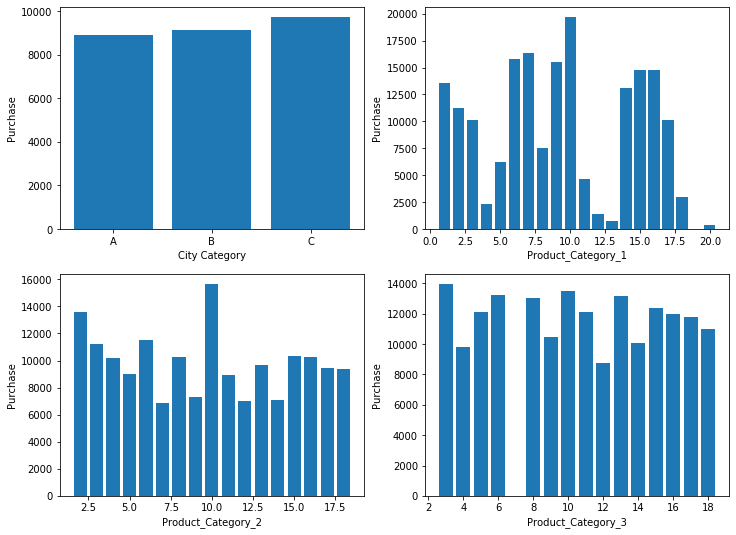

In [14]:
#Plot the graphs
plt.figure(figsize=(12,9))
#plt.subplot(2,2,1)
#plt.scatter(dataEncoded['Occupation'], dataEncoded['Purchase'])
#plt.xlabel("Occupation")
#plt.ylabel("Purchase")

#plt.subplot(2,2,2)
#plt.scatter(dataEncoded['Gender_M'], dataEncoded['Purchase'])
#plt.xlabel("Gender")
#plt.ylabel("Purchase")

#plt.subplot(2,2,3)
#plt.scatter(dataEncoded['Age_18-25'], dataEncoded['Purchase'])
#plt.xlabel("Age_18-25")
#plt.ylabel("Purchase")

plt.subplot(2,2,1)
plt.bar(list(set(dataset['City_Category'])),dataset.groupby('City_Category')["Purchase"].mean())
plt.xlabel("City Category")
plt.ylabel("Purchase")

plt.subplot(2,2,2)
plt.bar(list(set(dataset['Product_Category_1'])),dataset.groupby('Product_Category_1')["Purchase"].mean())
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")

newlist = (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18)
plt.subplot(2,2,3)
plt.bar(newlist,dataset.groupby('Product_Category_2')["Purchase"].mean())
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")

newlist1 = (3,4,5,6,8,9,10,11,12,13,14,15,16,17,18)
plt.subplot(2,2,4)
plt.bar(newlist1,dataset.groupby('Product_Category_3')["Purchase"].mean())
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")

#won't work because you don't don't have a y for every x
#plt.subplot(2,2,3)
#plt.bar(list(set(dataset['Product_Category_2'])),dataset.groupby('Product_Category_2')["Purchase"].mean())
#plt.xlabel("Product_Category_2")
#plt.ylabel("Purchase")

#plt.subplot(2,2,4)
#plt.bar(list(set(dataset['Product_Category_3'])),dataset.groupby('Product_Category_3')["Purchase"].mean())
#plt.xlabel("Product_Category_3")
#plt.ylabel("Purchase")

In [15]:
import statsmodels.api as sm

dataCleaned = sm.add_constant(dataEncoded)

c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
results = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase"] ,axis = 1)).fit()

In [17]:
print(results.summary())
#from initial results drop age, stay in current city years, 

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 1.577e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:54:59   Log-Likelihood:            -5.1815e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  550003   BIC:                         1.036e+07
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [18]:
results2 = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase", 'Age_18-25', 'Age_26-35','Age_36-45','Age_46-50','Age_51-55',
                                                             'Age_55+'] ,axis = 1)).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:07   Log-Likelihood:            -5.1818e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  550009   BIC:                         1.036e+07
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [19]:
results3 = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase", 'Age_18-25', 'Age_26-35','Age_36-45','Age_46-50','Age_51-55',
                                                             'Age_55+', 'Marital_Status'] ,axis = 1)).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 1.768e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:16   Log-Likelihood:            -5.1818e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  550010   BIC:                         1.036e+07
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [20]:
results4 = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase", 'Age_18-25', 'Age_26-35','Age_36-45','Age_46-50','Age_51-55',
                                                             'Age_55+', 'Marital_Status','Stay_In_Current_City_Years_1','Stay_In_Current_City_Years_2',
                                                             'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'] ,axis = 1)).fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 1.901e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:23   Log-Likelihood:            -5.1818e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  550014   BIC:                         1.036e+07
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [21]:
results5 = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase", 'Stay_In_Current_City_Years_1','Stay_In_Current_City_Years_2',
                                                             'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'] ,axis = 1)).fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 1.682e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:32   Log-Likelihood:            -5.1815e+06
No. Observations:              550068   AIC:                         1.036e+07
Df Residuals:                  550007   BIC:                         1.036e+07
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [22]:
dataCleaned.columns

Index(['const', 'Occupation', 'Marital_Status', 'Purchase', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_3.0', 'Product_Category_2_4.0',
       'Product_Category_2_5.0', 'Product_Category_2_6.0',
       'Product_

In [23]:
results6 = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase", 'Stay_In_Current_City_Years_1',
'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+', 
'Product_Category_2_3.0', 'Product_Category_2_4.0',
'Product_Category_2_5.0', 'Product_Category_2_6.0',
'Product_Category_2_7.0', 'Product_Category_2_8.0',
'Product_Category_2_9.0', 'Product_Category_2_10.0',
'Product_Category_2_11.0', 'Product_Category_2_12.0',
'Product_Category_2_13.0', 'Product_Category_2_14.0',
'Product_Category_2_15.0', 'Product_Category_2_16.0',
'Product_Category_2_17.0', 'Product_Category_2_18.0', 
'Age_18-25', 'Age_26-35','Age_36-45','Age_46-50','Age_51-55',
'Age_55+', 'Marital_Status' ] ,axis = 1)).fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 2.683e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:37   Log-Likelihood:            -5.1844e+06
No. Observations:              550068   AIC:                         1.037e+07
Df Residuals:                  550030   BIC:                         1.037e+07
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [24]:
##make plots

In [25]:
dataCleaned.columns

Index(['const', 'Occupation', 'Marital_Status', 'Purchase', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_3.0', 'Product_Category_2_4.0',
       'Product_Category_2_5.0', 'Product_Category_2_6.0',
       'Product_

In [26]:
results7 = sm.OLS(dataCleaned["Purchase"], dataCleaned.drop(["Purchase", 'Stay_In_Current_City_Years_1',
'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+', 
'Product_Category_2_3.0', 'Product_Category_2_4.0',
'Product_Category_2_5.0', 'Product_Category_2_6.0',
'Product_Category_2_7.0', 'Product_Category_2_8.0',
'Product_Category_2_9.0', 'Product_Category_2_10.0',
'Product_Category_2_11.0', 'Product_Category_2_12.0',
'Product_Category_2_13.0', 'Product_Category_2_14.0',
'Product_Category_2_15.0', 'Product_Category_2_16.0',
'Product_Category_2_17.0', 'Product_Category_2_18.0', 
'Age_18-25', 'Age_26-35','Age_36-45','Age_46-50','Age_51-55',
'Age_55+', 'Marital_Status', 'Product_Category_3_4.0', 'Product_Category_3_5.0',
'Product_Category_3_6.0', 'Product_Category_3_8.0',
'Product_Category_3_9.0', 'Product_Category_3_10.0',
'Product_Category_3_11.0', 'Product_Category_3_12.0',
'Product_Category_3_13.0', 'Product_Category_3_14.0',
'Product_Category_3_15.0', 'Product_Category_3_16.0',
'Product_Category_3_17.0', 'Product_Category_3_18.0' ] ,axis = 1)).fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 4.232e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:55:39   Log-Likelihood:            -5.1879e+06
No. Observations:              550068   AIC:                         1.038e+07
Df Residuals:                  550044   BIC:                         1.038e+07
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.334e+

In [27]:
from sklearn.model_selection import train_test_split
#x = dataScaled['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       #'region_northwest', 'region_southeast', 'region_southwest']

x = dataCleaned[['Occupation','Gender_M',
                 'City_Category_B', 'City_Category_C',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
       'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_3.0', 'Product_Category_2_4.0',
       'Product_Category_2_5.0', 'Product_Category_2_6.0',
       'Product_Category_2_7.0', 'Product_Category_2_8.0',
       'Product_Category_2_9.0', 'Product_Category_2_10.0',
       'Product_Category_2_11.0', 'Product_Category_2_12.0',
       'Product_Category_2_13.0', 'Product_Category_2_14.0',
       'Product_Category_2_15.0', 'Product_Category_2_16.0',
       'Product_Category_2_17.0', 'Product_Category_2_18.0',
       'Product_Category_3_4.0', 'Product_Category_3_5.0',
       'Product_Category_3_6.0', 'Product_Category_3_8.0',
       'Product_Category_3_9.0', 'Product_Category_3_10.0',
       'Product_Category_3_11.0', 'Product_Category_3_12.0',
       'Product_Category_3_13.0', 'Product_Category_3_14.0',
       'Product_Category_3_15.0', 'Product_Category_3_16.0',
       'Product_Category_3_17.0', 'Product_Category_3_18.0']]
y = dataCleaned["Purchase"]

#split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.score(x_test,y_test)

0.6468622052230552

In [30]:
lr.coef_

array([ 3.63068479e+00, -4.68165427e+01,  1.59287800e+02,  5.79408015e+02,
       -1.75574133e+03, -2.21425926e+03, -1.09450095e+04, -7.30737329e+03,
        2.09488744e+03,  2.83510979e+03, -6.04134815e+03,  2.29162704e+03,
        6.29765750e+03, -8.76023540e+03, -1.21553341e+04, -1.27634118e+04,
       -4.13223691e+02,  1.24801493e+03,  1.25316845e+03, -3.28171568e+03,
       -1.05281874e+04, -1.35757496e+04, -1.32304308e+04,  1.47472200e+03,
       -1.71212490e+03, -6.66746684e+02,  7.51696453e+01,  6.26396243e+02,
        2.97114915e+02, -1.40174481e+02,  1.46289561e+03, -2.88690941e+02,
       -4.28020318e+02, -1.16761782e+02, -1.49176264e+02, -1.86616622e+02,
        3.54970928e+01,  5.88780459e+02,  5.85046290e+02, -3.66646555e+03,
        6.08280427e+02,  6.33657663e+01,  1.65762786e+03,  3.91421468e+02,
       -8.82386774e+02, -5.40947899e+02,  3.72807944e+02, -7.75617144e+02,
        1.25761994e+02, -3.64703219e+02,  6.10673890e+01,  1.00841573e+03,
        2.28154692e+02])

In [31]:
lr.intercept_

13256.229462641893

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
XGRegressor = GradientBoostingRegressor()
#XGRegressor.fit(x_train,y_train)
#no confusion matrix because its not classification



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_depths = [3, 4]


In [ ]:
gb_scores = []
for d in gb_depths:
    gb = GradientBoostingRegressor(max_depth=d, learning_rate=0.3)
    gb_scores.append(np.sqrt(-cross_val_score(gb, x, y, scoring='neg_mean_squared_error', cv=3, n_jobs=2)).mean())

In [ ]:
gb_scores

In [33]:
y_pred = XGRegressor.predict(x_test)

In [34]:
#compare to y_test


In [35]:
XGRegressor.score(x_test,y_test)



0.6294967581872433

In [36]:
#from xgboost import XGBClassifier
#classifier = XGBClassifier()
#classifier.fit(x_train, y_train)



OSError: [WinError -529697949] Windows Error 0xe06d7363

In [ ]:
#predicting the test set results
#y_pred = classifier.predict(x_test)

In [ ]:
#making the confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)

In [ ]:
#apply k_fold cross validation
#from sklearn.model.selection import cross_val_score
#accuracies = cross_val_score(estimator = classifier, X=x_train, y = y_train, cv=10)
#accuracies.mean()
#accuracies.std()